In [0]:
####### How fraud cases are different from non-fraud cases?
####### Can we identify any feature which can explain/distinguish between two target classes?

In [0]:
### import files 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
def read_data(path):
    '''This function imports comma seperated values file.
    Input: path - file location
    Output: dataframe object'''
    return pd.read_csv(path)

##dataframe object 
df = read_data('fraud dataset.csv')
print(df.shape)

(9999, 51)


In [0]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 51 columns):
TransactionID     9999 non-null int64
isFraud           9999 non-null int64
TransactionDT     9999 non-null int64
TransactionAmt    9999 non-null float64
ProductCD         9999 non-null object
card1             9999 non-null int64
card2             9880 non-null float64
card3             9998 non-null float64
card4             9998 non-null object
card5             9977 non-null float64
card6             9998 non-null object
addr2             9086 non-null float64
dist1             3385 non-null float64
dist2             378 non-null float64
P_emaildomain     7894 non-null object
R_emaildomain     1625 non-null object
C1                9999 non-null int64
C2                9999 non-null int64
C3                9999 non-null int64
C4                9999 non-null int64
C5                9999 non-null int64
C6                9999 non-null int64
C7                9999 non-null int64
C

In [0]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df[df.isFraud==0]['card1'].nunique()

2034

##### list of challeneges to this dataset?
    - few numerical features
    - lot of missing values
    - imbalanced dataset (0 ~3% ; 1~97%)
    - column description missing

In [0]:
## segregating numerical and categorical columns
categorical_features = df.select_dtypes(include = np.object).columns
numerical_features   = df.drop(['isFraud','TransactionID'],axis = 1).select_dtypes(include = np.number).columns

print(categorical_features)
print(numerical_features)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')
Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15'], dtype='object')


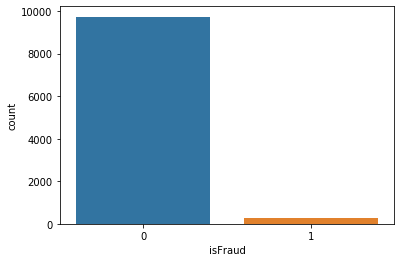

In [0]:
### target analysis - target variable is 'isFraud'
sns.countplot(df['isFraud'])

In [0]:
print("{}% of the data is having target class 1".format(round(len(df[df.isFraud==1])/len(df)*100),4))
print("{}% of the data is having target class 0".format(round(len(df[df.isFraud==0])/len(df)*100),4))

3% of the data is having target class 1
97% of the data is having target class 0


##### Missing values handling
    Guidelines
      - drop columns having missing values percentage >= 70 %
      - for columns < 70% missing values fill with one of the following approaches
          - median
          - mean if normally distributed
          - random values generated between 2 Standard deviation
          - or predict the missing values using a model

In [0]:
cnt_missing = df[numerical_features].isnull().sum()
per_missing = round(df[numerical_features].isnull().sum()/df.shape[0]*100,2)

_= pd.concat([pd.DataFrame(cnt_missing,columns = ['cntMissingValues']),
              pd.DataFrame(per_missing,columns=['perMissingValues'])], axis = 1)

_[_.perMissingValues>0].sort_values(['perMissingValues'], ascending = False)

,cntMissingValues,perMissingValues
D7,9776,97.77
D13,9719,97.20
dist2,9621,96.22
D12,9593,95.94
D14,9549,95.50
D6,9508,95.09
D8,8899,89.00
D9,8899,89.00
D11,7723,77.24
D5,7231,72.32


In [0]:
_[_.perMissingValues>70].sort_values(['perMissingValues'], ascending = False).index

Index(['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5'], dtype='object')

#### 
columns can be dropped:
    ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5']

In [0]:
_[(_.perMissingValues<70) & (_.perMissingValues>0)].sort_values(['perMissingValues'], ascending = False)

,cntMissingValues,perMissingValues
dist1,6614,66.15
D4,6230,62.31
D15,4930,49.30
D2,4576,45.76
D3,4272,42.72
D10,1265,12.65
addr2,913,9.13
card2,119,1.19
card5,22,0.22
card3,1,0.01


In [0]:
df[_[(_.perMissingValues<70) & (_.perMissingValues>0)].sort_values(['perMissingValues'], ascending = False).index].head()

,dist1,D4,D15,D2,D3,D10,addr2,card2,card5,card3
0,19.0,NaN,0.0,NaN,13.0,13.0,87.0,NaN,142.0,150.0
1,NaN,0.0,0.0,NaN,NaN,0.0,87.0,404.0,102.0,150.0
2,287.0,0.0,315.0,NaN,NaN,0.0,87.0,490.0,166.0,150.0
3,NaN,94.0,111.0,112.0,0.0,84.0,87.0,567.0,117.0,150.0
4,NaN,NaN,NaN,NaN,NaN,NaN,87.0,514.0,102.0,150.0


#### quick questions:
- should we include card details as features?

In [0]:
df.head(1)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T


In [0]:
# card3=> 150-200 (3digit)


###
1. card1,card2, card3, card4,card5,card6 -> get propertion of fraud cases
2. merge(card1,card2, card3, card4,card5)-> get propertion of fraud cases
3. merge(addr2	dist1	dist2) --> get propertion of fraud cases
4. P_emaildomain, R_emaildomain -> get propertion of fraud cases
5. Is there distinct TransactionAmt range for fraud case and none-fraud case?

In [0]:
#1. 
_ = pd.merge(df.groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows'}),df[df.isFraud==1].groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_1'}),on = ['card1'],how = 'inner')

pd.merge(_,df[df.isFraud==0].groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_0'}),on = ['card1'],how = 'left')

,total_rows,total_rows_1,total_rows_0
card1,,,
1085,8,3,5.0
1129,2,1,1.0
1191,2,2,NaN
1284,6,1,5.0
1342,20,3,17.0
1444,34,1,33.0
1595,1,1,NaN
1724,16,2,14.0
1764,14,1,13.0


In [0]:
df.card6.isnull().sum() ## this missing values can be dropped

1

In [0]:
#1. 
_ = pd.merge(df.groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows'}),df[df.isFraud==1].groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_1'}),on = ['card6'],how = 'inner')

pd.merge(_,df[df.isFraud==0].groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_0'}),
        on = ['card6'],how = 'left')

,total_rows,total_rows_1,total_rows_0
card6,,,
credit,2108,150,1958
debit,7890,115,7775


##### quick note:
 - credit card transactions having relatively higher fraud cases

In [0]:
C C - pearson correlation (r)
C D - ANOVA 
D D - chi-square test

In [0]:
# 150/2108

In [0]:
# 115/7890

In [0]:
df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F


In [0]:
### fill
df[['card1','card2','card3','card4','card5','card6']] = df[['card1','card2','card3','card4','card5','card6']].fillna(0)
df.card1 = df.card1.astype('int')
df.card2 = df.card2.astype('int')
df.card3 = df.card3.astype('int')
df.card5 = df.card5.astype('int')
df['card_'] = df.card1.astype('str')+df.card2.astype('str')+df.card3.astype('str')+df.card4.astype('str')+df.card5.astype('str')+df.card6.astype('str')
df.loc[:,['card1','card2','card3','card4','card5','card6','card_']]

,card1,card2,card3,card4,card5,card6,card_
0,13926,0,150,discover,142,credit,139260150discover142credit
1,2755,404,150,mastercard,102,credit,2755404150mastercard102credit
2,4663,490,150,visa,166,debit,4663490150visa166debit
3,18132,567,150,mastercard,117,debit,18132567150mastercard117debit
4,4497,514,150,mastercard,102,credit,4497514150mastercard102credit
...,...,...,...,...,...,...,...
9994,7794,266,185,mastercard,102,credit,7794266185mastercard102credit
9995,13052,254,150,visa,226,debit,13052254150visa226debit
9996,11137,0,150,visa,226,debit,111370150visa226debit
9997,15627,239,150,mastercard,224,debit,15627239150mastercard224debit


In [0]:
# card1 -> headquarter
# card2 -> dept
# card3 -> brand(saving/)

In [0]:
# df.groupby(['card4','card6'])[['isFraud']].sum().reset_index()

Hypothese to be validated:
##### df[df.duplicated(subset=['card_'])].shape
 1. number of total rows for each card_
 2. number of fraud transactions
 3. number of non-fraud transactions
 4. TransactionAmt stats for the given card_
 5. For remaining unique card_ (9999-7881), find proper of each fraud classes

In [0]:
# pd.DataFrame(df[df.isFraud==1].groupby(df['card1'].astype(str)+'|'+df['card2'].astype(str)+'|'+
#                                        df['card3'].astype(str)+'|'+df['card4'].astype(str)+'|'+
#                                        df['card5'].astype(str)+'|'+df['card6'].astype(str)).size(),
#                                        columns=['occurence']).sort_values('occurence',ascending=False)

In [0]:
df[df.duplicated(subset=['card_'])].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,card_
18,2987018,0,86725,47.95,W,4663,490,150,visa,166,debit,87.0,5.0,NaN,gmail.com,NaN,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,237.0,NaN,NaN,NaN,0.0,T,T,F,NaN,NaN,F,4663490150visa166debit
51,2987051,0,87328,226.00,W,7835,361,150,visa,226,debit,87.0,80.0,NaN,yahoo.com,NaN,4,4,0,0,0,1,0,0,2,0,1,0,11,3,29,29.0,0.0,259.0,0.0,NaN,NaN,NaN,NaN,28.0,259.0,NaN,NaN,NaN,259.0,T,T,T,M0,T,T,7835361150visa226debit
57,2987057,0,87445,50.00,H,11839,490,150,visa,226,debit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11839490150visa226debit
61,2987061,0,87596,58.95,W,12544,321,150,visa,226,debit,87.0,16.0,NaN,gmail.com,NaN,1,2,0,0,2,1,0,0,1,0,1,0,2,1,12,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,12.0,NaN,NaN,NaN,12.0,T,T,T,NaN,NaN,T,12544321150visa226debit
62,2987062,0,87601,200.00,W,18132,567,150,mastercard,117,debit,87.0,7.0,NaN,yahoo.com,NaN,1,1,0,0,1,2,0,0,1,0,1,0,4,1,104,104.0,39.0,94.0,39.0,NaN,NaN,NaN,NaN,104.0,104.0,NaN,NaN,NaN,104.0,T,T,T,NaN,NaN,T,18132567150mastercard117debit


In [0]:
df[df.duplicated(subset=['card_','isFraud'])].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,card_
18,2987018,0,86725,47.95,W,4663,490,150,visa,166,debit,87.0,5.0,NaN,gmail.com,NaN,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,237.0,NaN,NaN,NaN,0.0,T,T,F,NaN,NaN,F,4663490150visa166debit
51,2987051,0,87328,226.00,W,7835,361,150,visa,226,debit,87.0,80.0,NaN,yahoo.com,NaN,4,4,0,0,0,1,0,0,2,0,1,0,11,3,29,29.0,0.0,259.0,0.0,NaN,NaN,NaN,NaN,28.0,259.0,NaN,NaN,NaN,259.0,T,T,T,M0,T,T,7835361150visa226debit
57,2987057,0,87445,50.00,H,11839,490,150,visa,226,debit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11839490150visa226debit
61,2987061,0,87596,58.95,W,12544,321,150,visa,226,debit,87.0,16.0,NaN,gmail.com,NaN,1,2,0,0,2,1,0,0,1,0,1,0,2,1,12,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,12.0,NaN,NaN,NaN,12.0,T,T,T,NaN,NaN,T,12544321150visa226debit
62,2987062,0,87601,200.00,W,18132,567,150,mastercard,117,debit,87.0,7.0,NaN,yahoo.com,NaN,1,1,0,0,1,2,0,0,1,0,1,0,4,1,104,104.0,39.0,94.0,39.0,NaN,NaN,NaN,NaN,104.0,104.0,NaN,NaN,NaN,104.0,T,T,T,NaN,NaN,T,18132567150mastercard117debit


In [0]:
df[df.card_=='4663490150visa166debit'].isFraud.head()

2       0
18      0
1255    0
1350    0
1500    0
Name: isFraud, dtype: int64

In [0]:
df[df.card_=='4663490150visa166debit'].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,card_
2,2987002,0,86469,59.00,W,4663,490,150,visa,166,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,4663490150visa166debit
18,2987018,0,86725,47.95,W,4663,490,150,visa,166,debit,87.0,5.0,NaN,gmail.com,NaN,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,237.0,NaN,NaN,NaN,0.0,T,T,F,NaN,NaN,F,4663490150visa166debit
1255,2988255,0,129300,221.99,W,4663,490,150,visa,166,debit,87.0,53.0,NaN,live.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M0,F,F,4663490150visa166debit
1350,2988350,0,131823,48.95,W,4663,490,150,visa,166,debit,87.0,24.0,NaN,gmail.com,NaN,1,1,0,0,1,1,0,0,1,0,1,0,4,1,43,43.0,15.0,43.0,15.0,NaN,NaN,NaN,NaN,43.0,28.0,NaN,NaN,NaN,43.0,T,T,T,NaN,NaN,F,4663490150visa166debit
1500,2988500,0,134534,40.00,W,4663,490,150,visa,166,debit,87.0,NaN,NaN,NaN,NaN,1,1,0,0,2,0,0,0,1,0,1,0,3,1,10,10.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,F,4663490150visa166debit


In [0]:
print('Total number of categorical features:{}'.format(df[categorical_features].shape[1]))
cnt_missing = df[categorical_features].isnull().sum()
per_missing = round(cnt_missing/df.shape[0]*100,2)

_= pd.concat([pd.DataFrame(cnt_missing,columns = ['cntMissingValues']),
              pd.DataFrame(per_missing,columns=['perMissingValues'])], axis = 1)

_[_.perMissingValues>0].sort_values(['perMissingValues'], ascending = False)

Total number of categorical features:11


,cntMissingValues,perMissingValues
R_emaildomain,8374,83.75
M5,5793,57.94
M1,5790,57.91
M2,5790,57.91
M3,5790,57.91
M4,4886,48.86
M6,2572,25.72
P_emaildomain,2105,21.05


In [0]:
# drop_columns = ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5','R_emaildomain']
# df.drop(drop_columns, axis = 1, inplace = True)

#### TransactionAmt, TransactionDT Evaluation

Text(0.5, 1.0, 'Date vs. Amount')

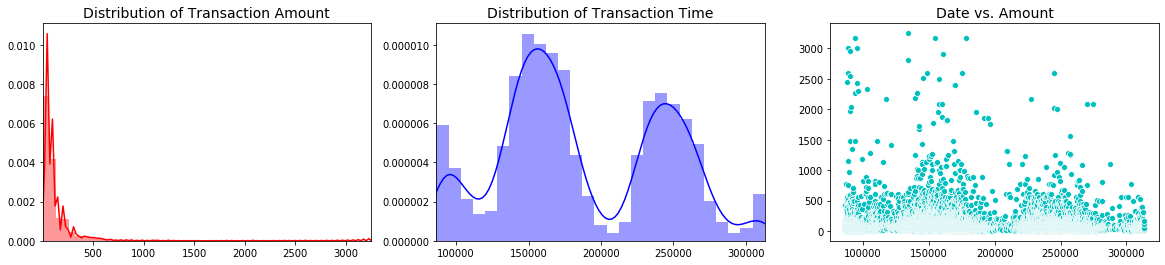

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

amount_val = df['TransactionAmt'].values
date_val = df['TransactionDT'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(date_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(date_val), max(date_val)])

sns.scatterplot(date_val, amount_val, ax=ax[2], color='c')
ax[2].set_title('Date vs. Amount', fontsize=14)
# ax[2].set_xlim([min(date_val), max(date_val)])

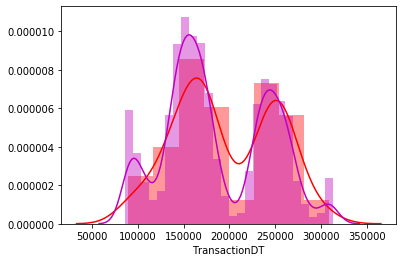

In [0]:
sns.distplot(df[df.isFraud==1]['TransactionDT'],color='r')
# plt.show()
sns.distplot(df[df.isFraud==0]['TransactionDT'],color='m')

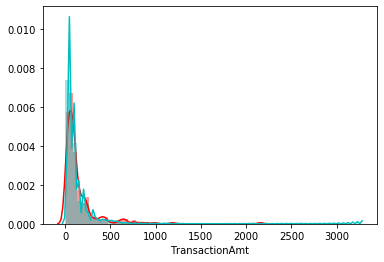

In [0]:
sns.distplot(df[df.isFraud==1]['TransactionAmt'],color='r')
# plt.show()
sns.distplot(df[df.isFraud==0]['TransactionAmt'],color='c')

In [0]:
# 1. does all the large amount transactions corresponds to fraud case?
# 2. fraud transaction timing?

Text(0.5, 1.0, 'Distribution of ProductCD wrt. Target')

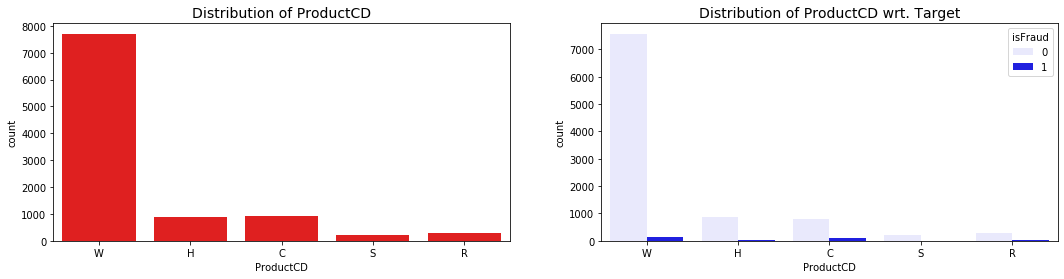

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.countplot('ProductCD', data = df, ax=ax[0], color='r')
ax[0].set_title('Distribution of ProductCD', fontsize=14)

sns.countplot('ProductCD', ax=ax[1], data = df, color='b',hue='isFraud')
ax[1].set_title('Distribution of ProductCD wrt. Target', fontsize=14)

In [0]:
# #### 
# 1. get ratio of all the productCD
# 2. verify ProductCD 'C' having values of credit card and master/visa card in columns 'card4' and 'card6'.

In [0]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr2', 'dist1', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'card_'], dtype='object')

In [0]:
### distinct values from M1 to M6.
# M1 ['T' 'nan']
# M2 ['T' 'nan' 'F']
# M3 ['T' 'nan' 'F']
# M4 ['M2' 'M0' 'nan' 'M1']
# M5 ['F' 'T' 'nan']
# M6 ['T' 'F' 'nan']

### data issue: M4 has a level 'M0' for which corresponding column does not exist
### what should be used to fill 'M1'? or should we drop 'M1'?
### filling above columns depends on their corresponding 0 and 1 proportion.

In [0]:
# M4->659 M2 
# M2-> 3290 (T) 319->(F)

In [0]:
print(df[(df.M4=='M2') & (df.M2=='T')]['isFraud'].value_counts())
print(df[(df.M4=='M2') & (df.M2=='F')]['isFraud'].value_counts())

0    30
1     1
Name: isFraud, dtype: int64
0    6
1    1
Name: isFraud, dtype: int64


Text(0.5, 1.0, 'Distribution of M4')

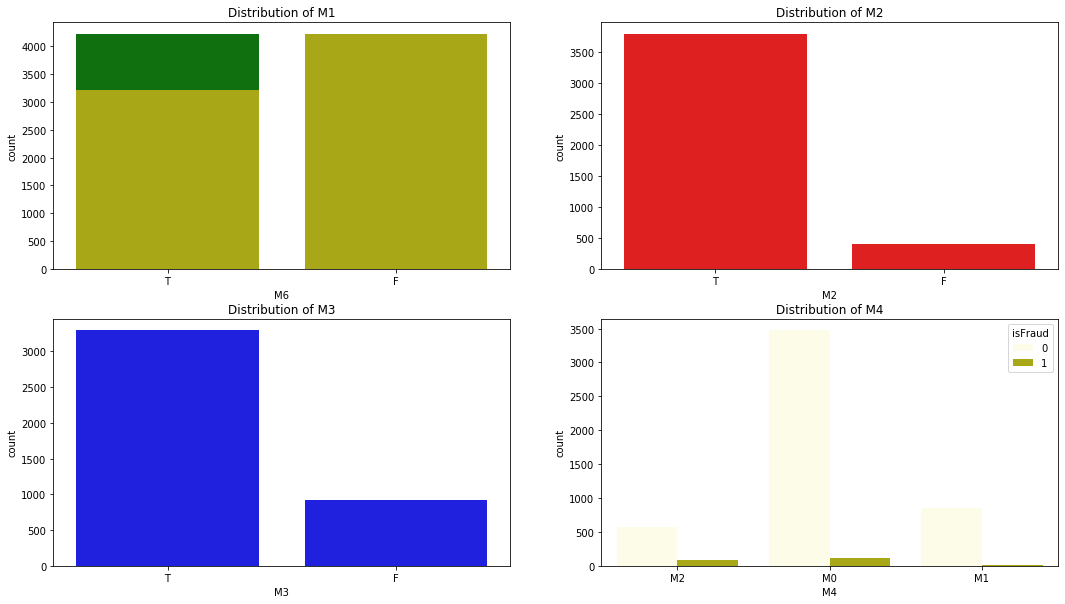

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(18,10))

sns.countplot('M1', data = df, ax=ax[0,0], color='g')
sns.countplot('M6', data = df, ax=ax[0,0], color='y')
ax[0,0].set_title('Distribution of M1', fontsize=12)

sns.countplot('M2', data = df, ax=ax[0,1], color='r')
ax[0,1].set_title('Distribution of M2', fontsize=12)

sns.countplot('M3', data = df, ax=ax[1,0], color='b')
ax[1,0].set_title('Distribution of M3', fontsize=12)

sns.countplot('M4', ax=ax[1,1], data = df, color='y',hue='isFraud')
ax[1,1].set_title('Distribution of M4', fontsize=12)

Text(0.5, 1.0, 'Distribution of address')

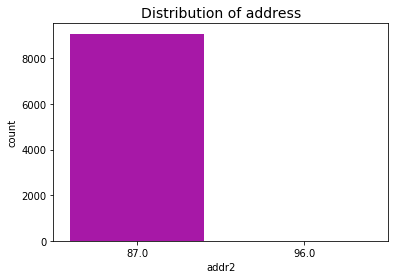

In [0]:
s = sns.countplot('addr2', data = df, color='m')
s.set_title('Distribution of address', fontsize=14)

In [0]:
# df.addr2.isnull().sum()

In [0]:
# 920/9999

In [0]:
# auc score